# Photo Classifier: Model evaluation

## Imports

In [1]:
from IPython.core.interactiveshell import InteractiveShell
%matplotlib inline
%load_ext autoreload
%autoreload 2
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import random
import numpy as np
import pandas as pd
from collections import Counter
from ipywidgets import interact
import ipywidgets as widgets
import torch

In [3]:
from file_io import load_pickle_file
from constants import *
from utils import *
from image_transforms import IMAGE_TRANSFORMS
from interpreters.utils import get_interpreter
import logging

In [4]:
if RANDOM_SEED:
    set_random_seeds(RANDOM_SEED)
logging.basicConfig(level=logging.INFO)

In [5]:
DATA_SET = 'test'

## Load model and data

In [6]:
model = load_pickle_file(MODEL_FILE_PATH)
image_data = load_pickle_file(IMAGE_DATA_PATH)

## Prediction

In [7]:
x = image_data.get_images(DATA_SET)
y_true = image_data.get_classes(DATA_SET)

In [8]:
y_pred, probabilities = model.predict(x, IMAGE_TRANSFORMS[DATA_SET])

## Results interpretation

In [9]:
Interpreter = get_interpreter(IS_MULTILABEL_CLASSIFICATION)
interpreter = Interpreter(x, y_pred, y_true, probabilities, model.class_to_label_mapping)

In [10]:
accuracy = interpreter.calculate_accuracy()
accuracy

0.956989247311828

In [11]:
accuracy_by_label = interpreter.calculate_accuracy_by_label()
accuracy_by_label

Teddybears       0.965517
Grizzly bears    1.000000
Black bears      0.916667
dtype: float64

In [12]:
confusion_matrix = interpreter.calculate_confusion_matrix()
confusion_matrix

,Teddybears,Grizzly bears,Black bears
Teddybears,0.965517,0.034483,0.000000
Grizzly bears,0.000000,1.000000,0.000000
Black bears,0.000000,0.083333,0.916667


In [13]:
most_incorrect_samples = interpreter.get_most_incorrect_samples(5)
most_incorrect_samples

,Teddybears propability,Grizzly bears propability,Black bears propability,true,predicted,error,confidence
58,0.136183,0.795833,0.067984,[Teddybears],[Grizzly bears],0.575878,0.696260
18,0.020079,0.842195,0.137727,[Black bears],[Grizzly bears],0.574849,0.770062
32,0.014228,0.666394,0.319378,[Black bears],[Grizzly bears],0.453748,0.565180
72,0.000411,0.633835,0.365754,[Black bears],[Grizzly bears],0.422830,0.550712
27,0.649762,0.346738,0.003500,[Teddybears],[Teddybears],0.233492,0.560041


In [14]:
most_uncertain_samples = interpreter.get_most_uncertain_samples(5)
most_uncertain_samples

,Teddybears propability,Grizzly bears propability,Black bears propability,true,predicted,error,confidence
72,0.000411,0.633835,0.365754,[Black bears],[Grizzly bears],0.422830,0.550712
27,0.649762,0.346738,0.003500,[Teddybears],[Teddybears],0.233492,0.560041
32,0.014228,0.666394,0.319378,[Black bears],[Grizzly bears],0.453748,0.565180
85,0.012163,0.258140,0.729697,[Black bears],[Black bears],0.180202,0.631556
58,0.136183,0.795833,0.067984,[Teddybears],[Grizzly bears],0.575878,0.696260


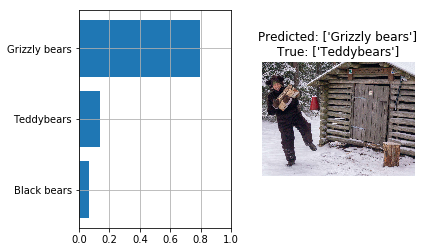

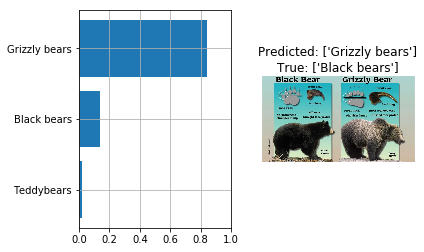

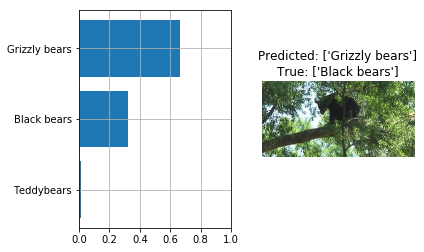

In [15]:
interpreter.plot_most_incorrect_samples(3)

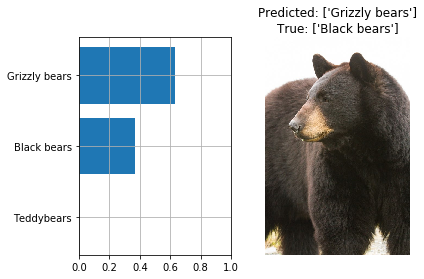

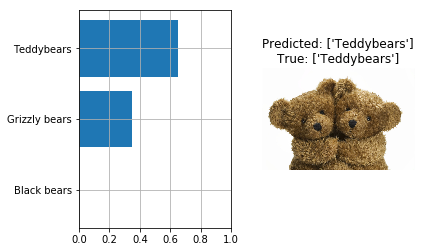

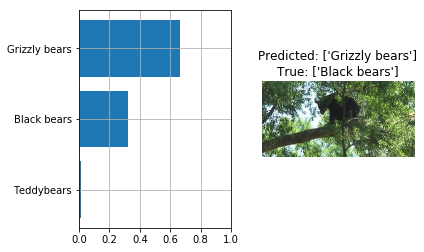

In [16]:
interpreter.plot_most_uncertain_samples(3)

In [17]:
@interact(index=widgets.IntSlider(min=0, max=len(y_true)-1, step=1, value=0, continuous_update=False))
def show_prediction(index=0):
    interpreter.plot_prediction(index)

interactive(children=(IntSlider(value=0, continuous_update=False, description='index', max=92), Output()), _do…